# Project 6  - Dimensionality Reduction with PCA

In the Exploratory Data Analysis (EDA), we have seen that some variables might be correlated to one another. A robust model is a simple model, which means that we want to keep only the information necessary (i.e., to predict whether a banknote is fake or genuine) by removing redundancy. For that purpose, in this notebook, we will perform a principal component analysis (PCA). The PCA is used to reduce the dimension of the features available by creating composite variables orthogonal to each other (i.e., independent and not correlated). 

This notebook include all the following steps:

    ✅ Scree Plot Analysis
    ✅ Factorial Plans with PCs
    ✅ 2D Projection of individuals
    ✅ Quality Analysis of the PCA and contributions of each variables
    ✅ Selection of the best component variable

After the EDA, We have now 2 datasets:

- with outliers
- without outliers

We want to know if filtering out the outliers from the dataset positively impacts our final model's accuracy. For this reason, all the following steps will be applied to both datasets.  

## Get started

In [6]:
import pandas as pd
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats  
import seaborn as sns
%matplotlib inline

from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import PCA_functions3

In [7]:
# Dataset with outliers
df1 = pd.read_csv(Path.cwd()/'dataset.csv',index_col=0)
df1.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55


In [8]:
# Dataset without outliers
df2 = pd.read_csv(Path.cwd()/'dataset_cleaned.csv',index_col=0)
df2.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,False,171.45,104.03,104.26,4.88,3.44,111.92
1,False,171.97,104.38,104.18,5.59,3.47,110.98
2,False,171.94,104.21,104.10,4.28,3.47,112.23
3,False,172.04,104.34,104.48,4.88,3.28,112.15
4,False,171.75,104.16,104.23,5.75,3.25,111.68


## Pre-processing

All the datasets' variables are expressed in the same units: millimeters. Nonetheless, scaling the variables is essential before applying a PCA because the range varies slightly between the variables.

For example:
- Margin range between 0.2 and 6
- Diagonal range between 172 and 174

As a result, even if all units are expressed in the same units, diagonal might weigh more in the model than margin. 

Data standardization procedures equalize the range and smooth the variability.

In [25]:
# Extract features, values and target

# dataset with outliers
features1 = df1.iloc[:,1:].columns
X1 = df1.iloc[:,1:].values
y1 =  df1['is_genuine'].values

# dataset without outliers
features2 = df2.iloc[:,1:].columns
X2 = df2.iloc[:,1:].values
y2 =  df2['is_genuine'].values

In [38]:
# Standardization

# with outliers
scaler = StandardScaler()
X_scaled1 = scaler.fit_transform(X1)

# without outliers
scaler = StandardScaler()
X_scaled2 = scaler.fit_transform(X2)

## PCA

In [48]:
# Apply the algorithm
pca = PCA()
X_PCA1 = pca.fit_transform(X_scaled1) #with outliers

## Scree plot

Remember that the main idea behind PCA is that most of the variance hold in high-dimensional data can be captured in a lower-dimensional subset composed by few principal components. 
Reducing the dimension is therefore based on choosing the right number of principal components to retain.  

A scree plot displays how much variance each principal components (PCs) captures from the data. It is a good visualization to check wether or not the PCA worked well. Ideally, the 1st component will capture the most variance, then the second one, and so on. 
The y axis is eigenvalues, which essentially stand for the amount of variance explained. 

- We can use this plot to select which PCs to keep according to the percentage of variance explained

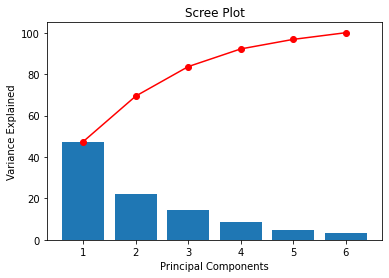

In [28]:
# Create visual
scree = pca.explained_variance_ratio_*100
plt.bar(np.arange(len(scree))+1, scree)
plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
plt.xlabel("Principal Components")
plt.ylabel("Variance Explained")
plt.title("Scree Plot")
plt.show(block=False)

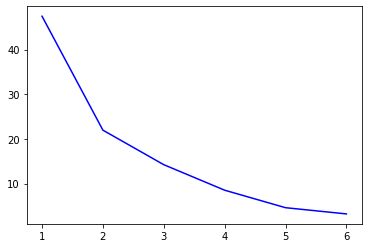

In [30]:
# Focus on the elbow
plt.plot(np.arange(len(scree))+1, scree,c="blue")
plt.show()

In [31]:
# Get eigenvalues for each components
print(pca.explained_variance_ratio_)

[0.47447921 0.21957106 0.14234524 0.08526295 0.04612822 0.03221331]


<div class="alert alert-block alert-info"> 
The first two components capture about 70% of the variance which is pretty low.
To select the number of PC to keep, in that case, we could use these rules of thumbs:

- Pick PCs with eigenvalues of at least 10%.
- The selected PCs should be able to describe at least 82% of the variance.
    
Based on the scree plot, we decide to keep the first 3 components as they capture about 82% of the variance which is relatively good. 
    
Generally speaking, if we end up with too many PCs (let's say more than 3), PCA might not be the best way to visualize your data. Other dimension reduction techniques might be preferred such as:

- t-SNE 
- MDS

References: 
- https://blog.bioturing.com/2018/06/18/how-to-read-pca-biplots-and-scree-plots/
- https://stats.stackexchange.com/questions/223450/t-sne-versus-mds
    
</div>

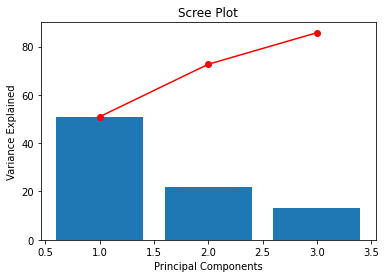

In [49]:
# Let's do it now for the dataset without outliers in another way

# Apply the algorithm
pca2 = PCA(0.82) # We pass in parameter the percentage of variance we want to hit with the algorithm. Here we want at least 82% of the variance explained
X_PCA2 = pca2.fit_transform(X_scaled2)

# Create visual
scree = pca2.explained_variance_ratio_*100
plt.bar(np.arange(len(scree))+1, scree)
plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
plt.xlabel("Principal Components")
plt.ylabel("Variance Explained")
plt.title("Scree Plot")
plt.show(block=False)

In [50]:
# Get eigenvalues for each components
print(pca2.explained_variance_ratio_)

[0.5091362  0.21749429 0.13059424]


<div class="alert alert-block alert-info"> Similarly, we can see that keeping the first 3 PCs is enough to hit 82% of the variance explained.
    We can also notice that we can reach 86% of variance explained with the first 3 PCs on the cleaned dataset VS 82% on the dataset with outliers. The next steps might confirm (or not) the necessity of working with a cleaned dataset.      
</div>

## Loadings Plots

The loadings can be understood as the weights for each original variable when calculating the principal component. Hence. the loadings plot shows the influence of each variable in a principal component. 

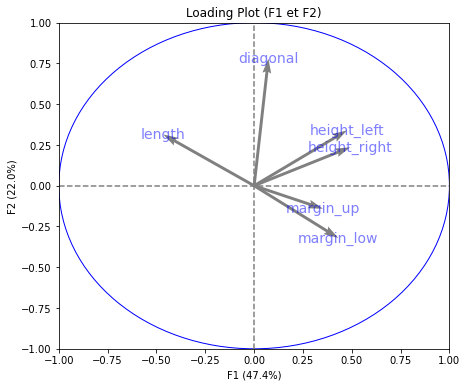

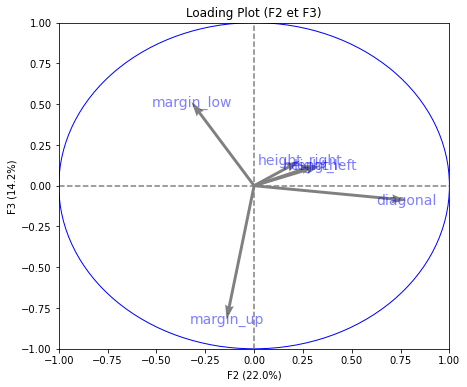

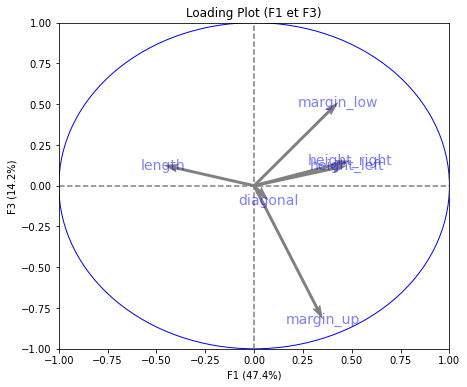

In [45]:
# Create Loadings Plots
pcs = pca.components_
PCA_functions3.display_circles(pcs, 6, pca, [(0,1),(1,2),(0,2)], labels = np.array(features1))

<div class='alert alert-block alert-info'> 

- F1 is representative of all variables except diagonal. Length is the only original feature that is negatively correlated to this plan.
- F2 is mostly representative of diagonal. The other features have a low weight (about 30%) in comparison.
- F3 is mostly representative of margin_up (negatively correlated to this plan), followed by margin_low. The other features have a very low weight (about 10%) in comparison. 

We can also encompass some of the observations made within the EDA about how the variables are correlated to each other. 
    
For example:
- height_left and height_right are strongly correlated to each other: the two vectors are close in each plans.
- length and margin_low/up are negatively correlated if we look from the plans F1-F2
- length and height_left/right are correlated if we look from the plans F2-F3

However, the correlation suspected during the EDA between:
- margin_up/low and height_left/right, are not convincing on the loadings plots.
</div>

In [51]:
# Let's replicate the previous operations on the cleaned dataset in another way

# dataset without outliers
F1 = pca2.components_[0]
F2 = pca2.components_[1]
F3 = pca2.components_[2]

pd.DataFrame({'F1':F1,'F2':F2,'F3':F3}, np.array(features2))

,F1,F2,F3
diagonal,-0.006171,0.818552,0.010471
height_left,-0.451702,0.373831,0.145392
height_right,-0.485857,0.194605,0.126479
margin_low,-0.435325,-0.304136,0.501155
margin_up,-0.367973,-0.056074,-0.840258
length,0.484724,0.238136,0.074603


<div class='alert alert-block alert-info'> The impact of the cleaning is noticeable only for the plan F1: 

- F1 is representative of all variables except diagonal: The values are all included in the range [-0.36;-0.48] except for diagonal (0.6). Length is the only original feature positively correlated to this plan (precisely the opposite of what we observed before).

The rest of the observations are similar to those on the dataset with outliers: 
- we can see the correlations between two variables when the difference between their respective values is very small (e.g. in F1 height_left = -0.45 & height_right = -0.48)
- or when the values are very close but the sign is opposite (e.g. in F1 length = 0.48 & margin_low = -0.44).


</div>

## Scores plots

The score plots indicate the projection of the data onto the span of the principal components. 
As in the previous section, this 3-dimensional set results in 3 score plots, one for each pairwise combination of PCs. 
We are using the field is_genuine (fake/genuine) as a label for our data to see if we can detect a pattern in the 3 different combination of PCs

Tips: If the first two components account for most of the variance in the data, you can use the score plot to assess the data structure and detect clusters, outliers, and trends. Groupings of data on the plot may indicate two or more separate distributions in the data. If the data follow a normal distribution and no outliers are present, the points are randomly distributed around zero.

References: https://support.minitab.com/en-us/minitab/18/help-and-how-to/modeling-statistics/multivariate/how-to/principal-components/interpret-the-results/all-statistics-and-graphs/

In [54]:
def display_factorial_planes(df, n_comp, pca, axis_ranks,labels=None, alpha=1,marker=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
    
            fig = plt.figure(figsize=(10,7))
        
            # Plot
            sns.scatterplot(x=df[:, d1], y=df[:, d2],alpha=alpha, marker=marker) # selection de PC1 et PC2
            
            # Labels
            if labels is not None:
                for i,(x,y) in enumerate(df[:,[d1,d2]]):
                    plt.text(x, y, labels[i],fontsize='10', ha='center',va='center') 
            
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))
        
            # Lines
            plt.plot([-3, 3], [0, 0], color='grey', linewidth= 0.7,ls='--')
            plt.plot([0, 0], [-3, 3], color='grey', linewidth= 0.7,ls='--')

            # Title
            plt.title("Individuals Projections on (F{} & F{})".format(d1+1, d2+1))
            plt.show(block=False)

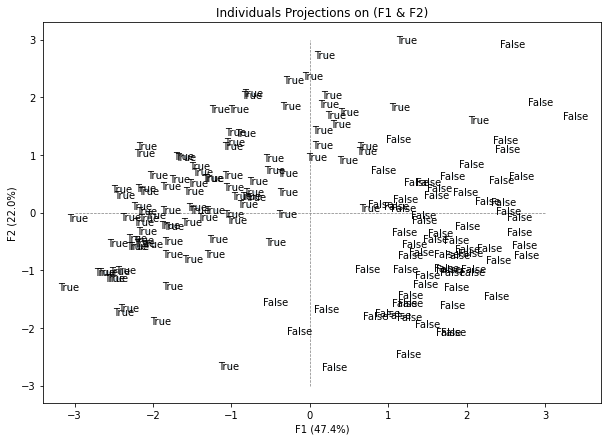

In [56]:
# Creating the score plots for the dataset with outliers
display_factorial_planes(X_PCA1, 3, pca, [(0,1)], labels=y1, marker='.', alpha = 0.2)

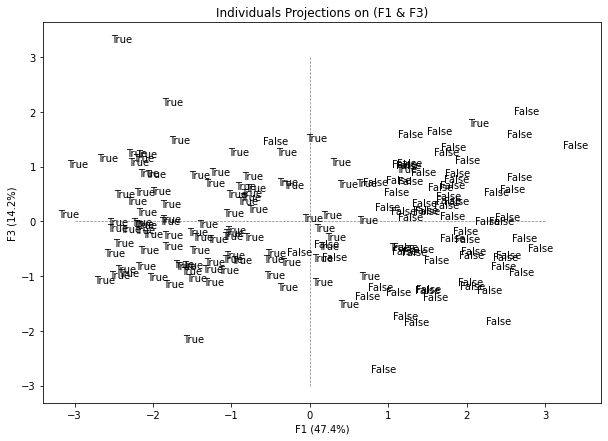

In [58]:
display_factorial_planes(X_PCA1, 3, pca, [(0,2)], labels=y1, marker='.', alpha = 0.2)

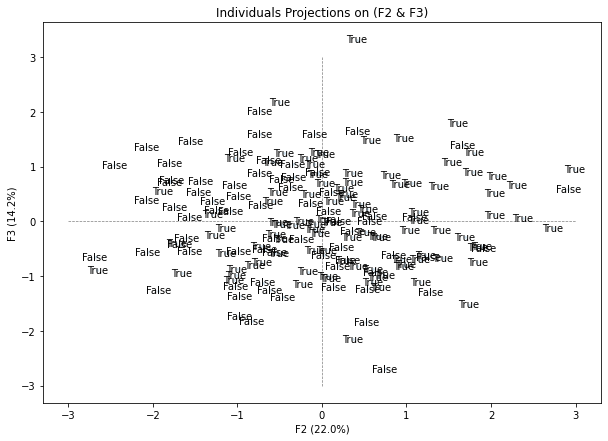

In [59]:
display_factorial_planes(X_PCA1, 3, pca, [(1,2)], labels=y1, marker='.', alpha = 0.2)

<div class='alert alert-block alert-info'> These plots are probably the most useful in this specific case study, to select the PCs to keep for our model.

- On the projection F1-F2, we can detect clearly 2 groups of data True (genuine) and False (fake) on the F1 plan. 
This indicate two separate distribution in the data as we have seen before (Cf. EDA).
We can suspect some outliers, especially in the top-right corner and at the bottom of the plot.

- Similarly, we see 2 groups of data in the projection F1-F3 and can suspect some points to be outliers especially in the top-left corner and at the bottom of the plot.

- The last projection is not relevant to separate our data in 2 groups and differenciate the genuine banknotes to the fake ones. 
The data points are grouped around the center of the plot. Some outliers are visible at the top and bottom of the plot.

</div>


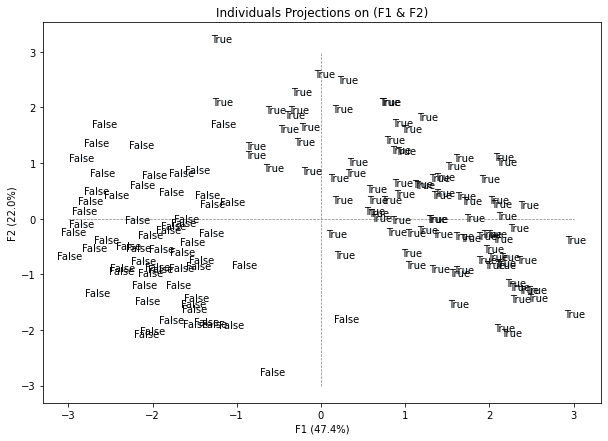

In [60]:
# Creating the score plots for the dataset without outliers
display_factorial_planes(X_PCA2, 3, pca, [(0,1)], labels=y2, marker='.', alpha = 0.2)

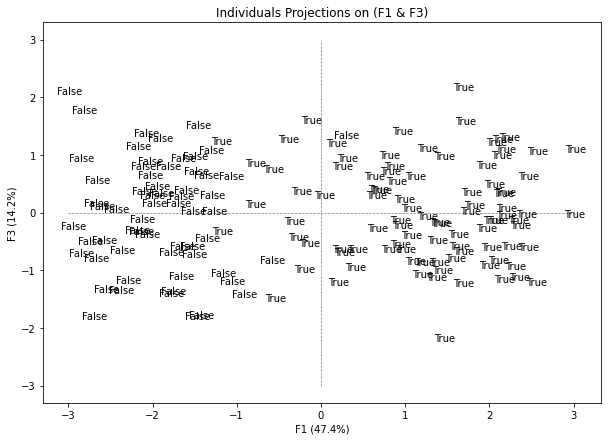

In [61]:
display_factorial_planes(X_PCA2, 3, pca, [(0,2)], labels=y2, marker='.', alpha = 0.2)

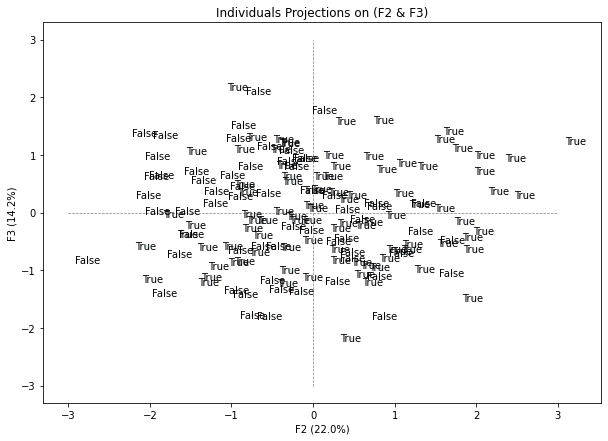

In [62]:
display_factorial_planes(X_PCA2, 3, pca, [(1,2)], labels=y2, marker='.', alpha = 0.2)

<div class='alert alert-block alert-info'> We can make the same observations on this dataset as those on the dataset with outliers. 
The impact of the cleaning is not very convincing on these plots. 
However, we can notice that overall, the cleaned data seem to be less scattered than the data with outliers.
    
All in all, the first PC seems to be the best to detect whether a banknote is genuine or fake (this apply for both dataset). This PC is not influence by the variable 'diagonal' but by all the others. This result corroborates what we already observed during the EDA, when we discovered that the variable diagonal was not the most sensitive to separate the data points between genuine and fake (the 2 distributions were overlapping).
</div>